In [280]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib
from soft_knn import SoftKNN
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import fractions
import itertools
from collections import Counter


In [2]:
def get_cmap(n, name='tab20'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
def create_system(n, verbose=False):
    A=[]
    for i in range(1,int(np.ceil(n/2.))):
        for j in range(2*i, n):#int(np.floor(n/2.))+i
            vector = np.zeros(n)
            vector[i-1]+=(1./(j/2.))
            vector[n-i+1-1]+=(1/(n-(j/2.)))
            vector[j-i+1-1]+=(-1./(j/2.))
            vector[n-j+i-1]+=(-1/(n-(j/2.)))
            A.append(vector)
            if verbose:
                print ("(y_{0}/{1})+(y_{2}/{3}) = (y_{4}/{1}) + (y_{5}/{3})    ".format(i,j/2.,n-i+1,n-(j/2.),j-i+1,n-j+i))
        if verbose: 
            print("\n")
    A.append(np.ones(n))
    A.append(np.zeros(n))
    A[-1][-1]=1
    b = np.zeros(len(A))
    b[-2]=1
    return A, b
def solve_system(A,b):
    soln, _, _, _ = np.linalg.lstsq(A,b,rcond=None)
    return soln
def labels_2_points_n_classes(n):
    denom = sum([j**2 for j in range(1,n)])
    y=[(n*(n-1)-i*(i-1))/denom for i in range(1,n+1)]
    return y
def expected_num_eqns(n):
    return (np.ceil(n/2.)-1)*(n-np.ceil(n/2.))
    

<IPython.core.display.Javascript object>


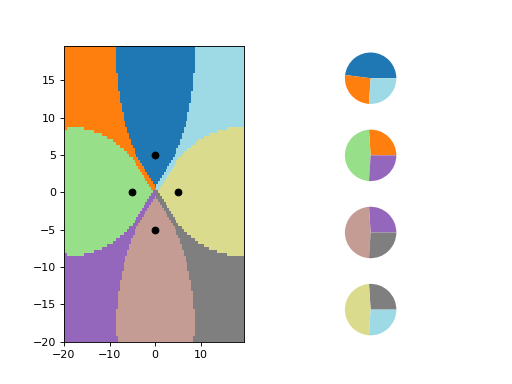

Button(description='Save image', style=ButtonStyle())

Output()

interactive(children=(IntSlider(value=10, continuous_update=False, description='frame', max=60, min=-60, step=…

In [3]:
ims=[]
fig=plt.figure()


def animate(frame, num_points, num_classes, mode, resolution, zoom, filename):
    
    #frame+=20
    ax_list=fig.axes
    [fig.delaxes(ax) for ax in ax_list]
    ax1 = fig.add_subplot(1,2,1)
    axs = [fig.add_subplot(num_points,2,2*(point+1)) for point in range(num_points)]
    if mode == "poly_and_center":
        frame+=20
        num_classes = 2*(num_points-1)+num_points
        polygon = matplotlib.patches.RegularPolygon((0,0),num_points-1, radius=5)
        dd=polygon.get_verts()[:-1]
        dd=np.append(dd,np.array([[0,0]]),axis=0)
        dy=np.zeros((num_points,num_classes))
        for i in range(num_points-1): 
            #Set the surrounding polygon classes
            dy[i][2*i]=0.4-frame*0.0012
            dy[i][(2*i+1)%(2*(num_points-1))]=0.2+frame*0.0004
            dy[i][(2*i-1)%(2*(num_points-1))]=0.2+frame*0.0004
            dy[i][(2*(num_points-1)+i)]=0.2+frame*0.0004
            #Set the central classes
            dy[-1][(2*(num_points-1)+i)]=0.2+frame*0.0004
        dy[-1][-1]=0.4-frame*0.0004*(num_points-1)
    if mode =="every_other":
        num_classes = 2*num_points
        polygon = matplotlib.patches.RegularPolygon((0,0),num_classes, radius=5)
        dd=polygon.get_verts()[:-1:2]
        dy=np.zeros((num_points,num_classes))
        for i in range(num_points):
            dy[i][2*i]=0.49-frame*0.001
            dy[i][(2*i+1)%num_classes]=0.255+frame*0.0005
            dy[i][(2*i-1)%num_classes]=0.255+frame*0.0005
    if mode == "poly_every_subset":
        num_classes = 2**num_points - 1
        polygon = matplotlib.patches.RegularPolygon((0,0),num_points, radius=5)
        dd=polygon.get_verts()[:-1]
        dy=np.full((num_points,num_classes),num_points/num_classes)
        #Incomplete
    if mode == "2points_n_classes":
        dd=np.array([[0,0],[1,0]])
        dy=np.zeros((num_points,num_classes))
        
        dy[0] = labels_2_points_n_classes(num_classes)
        #A, b = create_system(num_classes)
        #dy[0]=solve_system(A,b)
        
#         if num_classes ==3:
#             dy[0]=np.array([3/5,2/5,0])
#         if num_classes==4:
#             #dy[0]=np.array([5/12,4/12,3/12,0])
#             dy[0]=np.array([6/14,5/14,3/14,0])
#         if num_classes==5:
#             dy[0]=np.array([60/200,49/200,47/200,44/200,0])
#         if num_classes==6:
#             dy[0]=np.array([56/210,52/210,42/210,40/210,20/210,0])

     
        dy[1]=dy[0][::-1]    
    if mode == "3points_n_classes":
        dd=np.array([[-1,0],[0,0],[1,0]])
        dy=np.zeros((num_points,num_classes))
        
        dy[0] = labels_2_points_n_classes(num_classes)
        #A, b = create_system(num_classes)
        #dy[0]=solve_system(A,b)
        
#         if num_classes ==3:
#             dy[0]=np.array([3/5,2/5,0])
#         if num_classes==4:
#             #dy[0]=np.array([5/12,4/12,3/12,0])
#             dy[0]=np.array([6/14,5/14,3/14,0])
#         if num_classes==5:
#             dy[0]=np.array([60/200,49/200,47/200,44/200,0])
#         if num_classes==6:
#             dy[0]=np.array([56/210,52/210,42/210,40/210,20/210,0])

     
        dy[1]=dy[0][::-1] 
        dy[2]=dy[0]  
    #print(dy)
    if not mode != "true":
        distX=[]
        distY=[]
        for i in range(num_points):
            class_list = []
            for j in range(num_classes):
                class_list.append(int(dy[i][j]*granularity)+1*(mode!="2points_n_classes"))
                distY.append(np.repeat(j, class_list[-1]))
            #print(class_list)
            #class_list.append(granularity-sum(class_list))
            #print(class_list)
            #distY.append(np.repeat(i, class_list[-1]))
            distX.append(np.repeat([dd[i]], sum(class_list),axis=0))
            #tempy=
            
            
        distX=np.concatenate(distX)
        distY=np.concatenate(distY)
    distX=dd
    distY=dy
        #print(distX)
        #print(distY)

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFA8E8', '#A8FFE8', '#E8A8FF', '#E8FFA8' ])
    cmap_bold = ListedColormap(['#FF8888', '#88FF88', '#8888FF', '#994282', '#429982', '#824299' ,'#829942' ])
    cmap_bolder = ListedColormap(['#000000', '#000000', '#000000'])
    colors=['#FFAAAA', '#AAFFAA', '#AAAAFF']
    if num_classes>20:
        cmap="gist_ncar"
    else:
        cmap="tab20"
    cmap_single = get_cmap(num_classes, cmap)
    colors=cmap_single(range(num_classes))
    # create KNN classifier
    clf = SoftKNN()
    #clf = neighbors.KNeighborsClassifier(min(n_neighbors, len(distX)), weights=weights)
    clf.fit(distX, distY)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if mode=="2points_n_classes":
        x_min, x_max = -0-5+zoom, 1 + 5-zoom
        y_min, y_max = -1+(-5+zoom)/2, 1 + (5-zoom)/2
    elif mode=="3points_n_classes":
        x_min, x_max = -1-5+zoom, 1 + 5-zoom
        y_min, y_max = -1+(-5+zoom)/2, 1 + (5-zoom)/2
    elif mode=="every_other":
        x_min, x_max = -20,20
        y_min, y_max = -20,20
    else:
        x_min, x_max = -10,10
        y_min, y_max = -10,10
    size = (x_max-x_min)*(y_max-y_min)
    desired_particles = 6000./resolution
    h = (size/desired_particles)**0.5  # step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax1.clear()
    ax1.pcolormesh(xx, yy, Z, cmap=cmap_single)
    if not mode =="true": 
        ax1.scatter(distX[:, 0], distX[:, 1], c="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    #plt.title("3-Class classification (k = %i)")
    for i in range(num_points):
        axs[i].pie(dy[i], colors=colors)

    if mode== "2points_n_classes":
        axs[0].title.set_text("Left")
        axs[1].title.set_text("Right")


#play = widgets.Play(
#      value=50,
#      min=0,
#      max=100,
#      step=1,
#      interval=2000,
#      description="Press play",
#     disabled=False
#  )
# slider=widgets.IntSlider()
# widgets.jslink((play, 'value'), (slider, 'value'))
# widgets.HBox([play, slider])
#interact(animate,frame=10)
frame=widgets.IntSlider(min=-60, max=60, value=10, step=10, continuous_update=False)
num_points=widgets.IntSlider(min=2, max=12, continuous_update=False)
num_classes=widgets.IntSlider(min=2, max=24, disabled=True, continuous_update=False)
mode=widgets.Dropdown(
    options=['poly_and_center', 'every_other', '2points_n_classes', '3points_n_classes'],
    value='every_other',
    description='Mode:',
    disabled=False,
)
resolution = widgets.RadioButtons(
    options=[("Very Low",1.0),("Low",0.8),("Medium",0.6),("High", 0.4),("Very High", 0.2)],
    description='Resolution:',
    value=0.6,
    disabled=False
)
zoom = widgets.IntSlider(min=-5, max=5, value=5, step=1, continuous_update=False, disabled=True)
filename=widgets.Text(
    value='image.png',
    placeholder='image.png',
    description='Filename:',
    disabled=False
)
# save=widgets.Button(
#     description='Save Image')
# output = widgets.Output()

# display(save, output)
# def on_save(b):
#     with output:
#         plt.savefig("abc")
# save.on_click(on_save)
from IPython.display import display
button = widgets.Button(description='Save image')
output = widgets.Output()
display(button, output)
def on_save(b):
    with output:
        plt.savefig(filename.value)


button.on_click(on_save)


def update_points_range(*args):
    if mode.value=="every_other":
        num_classes.max=2*num_points.max
        num_classes.min=1
        num_classes.value = num_points.value*2
        num_classes.disabled=True
        num_points.disabled=False
        num_points.max = 12
        num_points.min = 4
        frame.disabled=False
        zoom.disabled=True
    if mode.value=="poly_and_center":
        num_points.disabled=False
        num_points.max = 12
        num_points.min = 4
        num_classes.max=3*num_points.max-2
        num_classes.min=1
        num_classes.value = 3*num_points.value-2
        num_classes.disabled=True
        frame.disabled=False
        zoom.disabled=True

    if mode.value=="2points_n_classes":
        num_points.min = 2
        num_points.max = 2
        num_points.value = 2
        num_points.disabled=True
        num_classes.min=2
        num_classes.max=20
        num_classes.value=3
        num_classes.disabled=False
        frame.disabled=True
        zoom.disabled=False
        resolution.value=0.2
    if mode.value=="3points_n_classes":
        num_points.min = 3
        num_points.max = 3
        num_points.value = 3
        num_points.disabled=True
        num_classes.min=2
        num_classes.max=20
        num_classes.value=3
        num_classes.disabled=False
        frame.disabled=True
        zoom.disabled=False
        resolution.value=0.2

mode.observe(update_points_range, 'value')
num_points.observe(update_points_range)
interactive_plot=interactive(animate,frame=frame, num_points=num_points, num_classes=num_classes,mode=mode, resolution=resolution, zoom=zoom, filename=filename)
output = interactive_plot.children[-1]
output.layout.height = '350px'

interactive_plot



In [150]:
def create_system(n, verbose=False):
    A=[]
    for i in range(1,int(np.ceil(n/2.))):
        for j in range(2*i, n):#int(np.floor(n/2.))+i
            vector = np.zeros(n)
            vector[i-1]+=(2*n-j)
            vector[n-i+1-1]+=(j)
            vector[j-i+1-1]+=(-(2*n-j))
            vector[n-j+i-1]+=(-j)
            A.append(vector)
            if verbose:
                print ("(y_{0}/{1})+(y_{2}/{3}) = (y_{4}/{1}) + (y_{5}/{3})    ".format(i,j/2.,n-i+1,n-(j/2.),j-i+1,n-j+i))
        if verbose: 
            print("\n")
    A.append(np.ones(n))
    A.append(np.zeros(n))
    A[-1][-1]=1
    b = np.zeros(len(A))
    b[-2]=1
    return A, b

n=8
A,b=create_system(n, verbose=False)
print ("Expected: {0} Found: {1}".format(expected_num_eqns(n),len(A)-2))
print("".join([str(a)+"\n" for a in A]))

C=A[:(n-2)]
C.append(A[-1])
C.append(A[-2])
# if n%2==1:
#C.append(A[-3])
print(np.linalg.matrix_rank(C))
def solve_system(A,b):
    soln, rsq, _, _ = np.linalg.lstsq(A,b,rcond=None)
    return soln, rsq
#print(solve_system(A,b))
soln=solve_system(A,b)[0]
print([str(fractions.Fraction(i).limit_denominator()) for i in soln])
choices = np.transpose(np.array(A[:n-2]))
#print(choices)
target=A[n-2+n-4]
#print(target)
soln=solve_system(choices, target)
[str(fractions.Fraction(i).limit_denominator()) for i in soln[0]]

Expected: 12.0 Found: 12
[ 14. -14.   0.   0.   0.   0.  -2.   2.]
[ 13.   0. -13.   0.   0.  -3.   0.   3.]
[ 12.   0.   0. -12.  -4.   0.   0.   4.]
[ 11.   0.   0.  -5. -11.   0.   0.   5.]
[ 10.   0.  -6.   0.   0. -10.   0.   6.]
[ 9. -7.  0.  0.  0.  0. -9.  7.]
[  0.  12. -12.   0.   0.  -4.   4.   0.]
[  0.  11.   0. -11.  -5.   0.   5.   0.]
[  0.  10.   0.  -6. -10.   0.   6.   0.]
[ 0.  9. -7.  0.  0. -9.  7.  0.]
[  0.   0.  10. -10.  -6.   6.   0.   0.]
[ 0.  0.  9. -7. -9.  7.  0.  0.]
[1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 1.]

8
['1/5', '27/140', '5/28', '11/70', '9/70', '13/140', '1/20', '0']


['0', '-4/7', '5/7', '2/7', '-3/7', '0']

In [173]:
def unit_polygon(numVertices):
    theta = ((np.float128(2) * np.pi / np.float128(numVertices)) * np.arange(numVertices + 1)
                     # This initial rotation is to make sure the polygon always
                     # "points-up".
                     + np.pi / np.float128(2))
    verts = np.column_stack((np.cos(theta), np.sin(theta)))
    return verts
def find_centroids(points):
        subsets=[]
        for i in range(len(points)):
            subsets+=list(itertools.combinations(points,i+1))
        centroids=[np.round(np.mean(subset,0),17) for subset in tqdm(subsets)]
#         for i in range(len(points)):
#             for subset in itertools.combinations(points,i+1):
#                 subsets.append(subset)
#                 centroid = np.round(np.mean(subset,0),14)
#                 centroids.append(centroid)
        return centroids
def unique_points(points):
        unique_data = np.unique(points, return_counts=True, axis=0)#[list(x) for x in set(tuple(x) for x in points)]
        return unique_data
for n in range(21,22):
    #polygon = matplotlib.patches.RegularPolygon((0,0),n, radius=1)
    #dd=polygon.get_verts()[:-1]
    dd = unit_polygon(n)[:-1]

    centroids2=np.array(find_centroids(dd))
    #print(centroids2)
    unique_data,counts=unique_points(centroids2)
    print("Expected: {0} Found: {1}".format(len(centroids2),len(unique_data)))
    print(centroids2[0:100])
    break
    plt.scatter(centroids2[:,0],centroids2[:,1])
    plt.scatter(dd[:,0],dd[:,1], color="black")
    fracs=[[fractions.Fraction(i).limit_denominator() for i in coord] for coord in unique_data]
    [print(frac) for frac in fracs]
    print(counts)
    


Expected: 2097151 Found: 1970874
[[ 6.00000000e-17  1.00000000e+00]
 [-2.94755174e-01  9.55572806e-01]
 [-5.63320058e-01  8.26238774e-01]
 [-7.81831482e-01  6.23489802e-01]
 [-9.30873749e-01  3.65341024e-01]
 [-9.97203797e-01  7.47300936e-02]
 [-9.74927912e-01 -2.22520934e-01]
 [-8.66025404e-01 -5.00000000e-01]
 [-6.80172738e-01 -7.33051872e-01]
 [-4.33883739e-01 -9.00968868e-01]
 [-1.49042266e-01 -9.88830826e-01]
 [ 1.49042266e-01 -9.88830826e-01]
 [ 4.33883739e-01 -9.00968868e-01]
 [ 6.80172738e-01 -7.33051872e-01]
 [ 8.66025404e-01 -5.00000000e-01]
 [ 9.74927912e-01 -2.22520934e-01]
 [ 9.97203797e-01  7.47300936e-02]
 [ 9.30873749e-01  3.65341024e-01]
 [ 7.81831482e-01  6.23489802e-01]
 [ 5.63320058e-01  8.26238774e-01]
 [ 2.94755174e-01  9.55572806e-01]
 [-1.47377587e-01  9.77786403e-01]
 [-2.81660029e-01  9.13119387e-01]
 [-3.90915741e-01  8.11744901e-01]
 [-4.65436874e-01  6.82670512e-01]
 [-4.98601899e-01  5.37365047e-01]
 [-4.87463956e-01  3.88739533e-01]
 [-4.33012702e-01  2.

In [207]:
import sympy
from tqdm.notebook import tqdm
from sympy.geometry.util import centroid
from sympy.plotting import plot as symplot


from sympy.utilities.iterables import subsets

from sympy.utilities.iterables import uniq

def find_centroids(points):
        subs=list(subsets(points))
        centroids=[centroid(*subset) for subset in  tqdm(subs)]
#             for subset in ksubsets(points,i+1): #(itertools.combinations(points,i+1)):
#                 #subsets.append(subset)
#                 centr= centroid(*subset)
#                 centroids.append(centr)
        return subs[1:], centroids[1:]

def unique_points(points):
        unique_data = uniq(points)
        return unique_data
def find_generating_vertices(target,centroids,subs, testing=False):
    reps = centroids.count(target)
    indices=[-1]
    for i in range(reps):
        last_index=indices[-1]
        index=centroids[last_index+1:].index(target)+last_index+1
#         print(centroids[index])
        indices.append(index)
    indices=indices[1:]
    out_subs = [subs[i] for i in indices]
#     print(out_subs)
    if testing:
        test_centroids = [centroid(*sub) for sub in out_subs]
#     print(test_centroids)
#     print(target)
        test=[centr.equals(target) for centr in test_centroids]
#     print(test)
    
        assert(all(test))
    return out_subs
def find_unique_combos(points):
        #print(points.shape)
        unique_data = np.unique(points, return_counts=True, axis=0)#[list(x) for x in set(tuple(x) for x in points)]
        return unique_data
def overlap_summary(overlaps):
    ocounts = [overlap[0] for overlap in overlaps]
    targets = [overlap[1] for overlap in overlaps]
    combos=[]
    #print(ocounts)
    for overlap in overlaps:
        ocount,otarget=overlap
        #print("Target: {0} Freq: {1}".format(otarget,ocount))
        ogens=find_generating_vertices(otarget,centroids,subs)
        size_set=[len(gen_set) for gen_set in ogens]
        #print(size_set)
        #[print("Size: {0}".format(len(gen_set))) for gen_set in ogens]
        combo=[ocount, str(size_set)]
        combos.append(combo)
    combos=np.array(combos)
    unique_combos, combo_counts = find_unique_combos(combos)
    [print(it) for it in list(zip(unique_combos,combo_counts))]
    #print(combo_counts)
for n in range(14,15):
    p=sympy.Polygon((0,0),5,n=n)
    dd=p.vertices
    

    subs, centroids=find_centroids(dd)
    unique_data=list(unique_points(centroids))
    counts = [centroids.count(u) for u in unique_data]
    print("Expected: {0} Found: {1}".format(len(centroids),len(unique_data)))
#     plt.scatter([centroid[0]for centroid in centroids],[centroid[1] for centroid in centroids])
    #plt.scatter([unique[0] for unique in unique_data],[unique[1] for unique in unique_data])
    print(counts)
    
    zipped=list(zip(counts,unique_data))
    #[plt.scatter(i[0],i[1], color="black") for i in dd]
    overlaps=[tup for tup in zipped if tup[0]>1]
    #[plt.scatter(tup[1][0],tup[1][1]) for tup in overlaps]
    #[print(i) for i in overlaps]
#     print("Centroid 0")
#     print(centroids[0])
#     print(subs[0])
#     print(centroid(*subs[0]))
#     print("Done")
    #print(centroids.index(overlaps[1][1]))
    overlap_summary(overlaps)
#     for overlap in overlaps:
#         count,target=overlap
#         print("Target: {0} Freq: {1}".format(target,count))
#         gens=find_generating_vertices(target,centroids,subs)
#         [print("Size: {0}\n{1}".format(len(gen_set),gen_set)) for gen_set in gens]
#         print("\n")
    #print(counts)
    #print(centroids[0:100])


Expected: 16383 Found: 8756
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 127, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

(array(['10', '[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]'], dtype='<U410'), 1)
(array(['10', '[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]'], dtype='<U410'), 52)
(array(['10', '[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]'], dtype='<U410'), 2)
(array(['10', '[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]'], dtype='<U410'), 52)
(array(['12', '[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]'], dtype='<U410'), 1)
(array(['12', '[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]'], dtype='<U410'), 1)
(array(['127',
       '[2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 14]'],
      dtype='<U410'), 1)
(array(['15', '[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]'],
      dtype='<U410'), 11)
(array(['15', '[9, 9, 9, 9

In [201]:
zipped=list(zip(counts,unique_data))
    #[plt.scatter(i[0],i[1], color="black") for i in dd]
overlaps=[tup for tup in zipped if tup[0]>1]
print(len(overlaps))
    #[plt.scatter(tup[1][0],tup[1][1]) for tup in overlaps]
    #[print(i) for i in overlaps]
#     print("Centroid 0")
#     print(centroids[0])
#     print(subs[0])
#     print(centroid(*subs[0]))
#     print("Done")
    #print(centroids.index(overlaps[1][1]))
overlap_summary(overlaps)

2990
(array(['10', '[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]'], dtype='<U410'), 1)
(array(['10', '[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]'], dtype='<U410'), 52)
(array(['10', '[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]'], dtype='<U410'), 2)
(array(['10', '[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]'], dtype='<U410'), 52)
(array(['12', '[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]'], dtype='<U410'), 1)
(array(['12', '[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]'], dtype='<U410'), 1)
(array(['127',
       '[2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 14]'],
      dtype='<U410'), 1)
(array(['15', '[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]'],
      dtype='<U410'), 11)
(array(['15', '[9, 9,

In [415]:
def find_unique_combos(points):
        #print(points.shape)
        unique_data = np.unique(points, return_counts=True, axis=0)#[list(x) for x in set(tuple(x) for x in points)]
        return unique_data
def overlap_summary(overlaps):
    ocounts = [overlap[0] for overlap in overlaps]
    targets = [overlap[1] for overlap in overlaps]
    combos=[]
    #print(ocounts)
    for overlap in overlaps:
        ocount,otarget=overlap
        #print("Target: {0} Freq: {1}".format(otarget,ocount))
        ogens=find_generating_vertices(otarget,centroids,subs)
        size_set=[len(gen_set) for gen_set in ogens]
        #print(size_set)
        #[print("Size: {0}".format(len(gen_set))) for gen_set in ogens]
        combo=[ocount, str(size_set)]
        combos.append(combo)
    combos=np.array(combos)
    unique_combos, combo_counts = find_unique_combos(combos)
    [print(it) for it in list(zip(unique_combos,combo_counts))]
    #print(combo_counts)
overlap_summary(overlaps)
#print(counts.count(10))
#print(counts.count(6))

(array(['10', '[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]'], dtype='<U304'), 12)
(array(['12', '[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]'], dtype='<U304'), 12)
(array(['12', '[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]'], dtype='<U304'), 12)
(array(['2', '[5, 5]'], dtype='<U304'), 12)
(array(['2', '[6, 6]'], dtype='<U304'), 180)
(array(['2', '[7, 7]'], dtype='<U304'), 12)
(array(['2', '[9, 9]'], dtype='<U304'), 36)
(array(['3', '[3, 3, 6]'], dtype='<U304'), 36)
(array(['3', '[5, 5, 5]'], dtype='<U304'), 84)
(array(['3', '[7, 7, 7]'], dtype='<U304'), 84)
(array(['4', '[4, 4, 4, 4]'], dtype='<U304'), 12)
(array(['4', '[8, 8, 8, 8]'], dtype='<U304'), 12)
(array(['5', '[4, 4, 4, 4, 4]'], dtype='<U304'), 36)
(array(['5', '[8, 8, 8, 8, 8]'], dtype='<U304'), 36)
(array(['5', '[9, 9, 9, 9, 9]'], dtype='<U304'), 12)
(array(['6', '[4, 4, 4, 4, 4, 4]'], dtype='<U304'), 12)
(array(['6', '[5, 5, 5, 5, 5, 5]'], dtype='<U304'), 36)
(array(['6', '[6, 6, 6, 6, 6, 6]'], dtype='<U304'), 12)
(array(['6', '[7, 7, 7, 7, 7, 7]'], 

[      0       2       0      14       0      70       0     382       0
    2390       0    9100    3962   41486       0  185614       0  804294
       0 3367628]


<IPython.core.display.Javascript object>


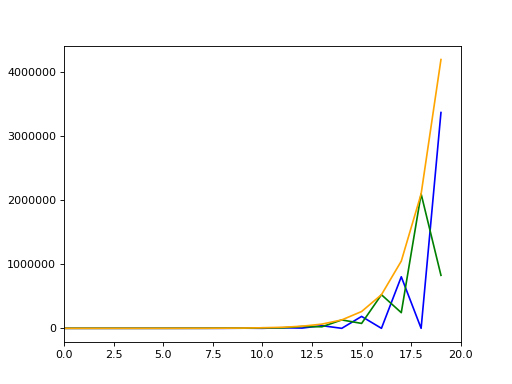

In [282]:
found=[7,13,31,49,127,185,511,641,2047,1705,8191,7283,28805,24049,131071, 76529, 524287, 244281, 2097151,826675, 8388607]
expected=[2**n-1 for n in range(3,len(found)+3)]
#print(expected)
print(np.array(expected)-np.array(found))
plt.plot(np.array(expected)-np.array(found), color="blue")
plt.plot(found, color="green")
plt.plot(expected, color="orange")
plt.xlim(0,len(found))
plt.show()

In [178]:
%load_ext cython


In [294]:
#%%cython
import numpy as np
from collections import Counter
import sympy
from tqdm.notebook import tqdm
from sympy import Point
from sympy.utilities.iterables import subsets
from multiprocessing import Pool
from natsort import natsorted
def center(sub):
    return str(np.mean(sub,0))
def find_centroids(points):
        subs=list(subsets(points))
        #centroids=list(str(list(sum(x)/len(sub) for x in zip(*sub)))for sub in tqdm(subs[1:]))
        #centroids=subs.applyfunc(lambda sub: centroid(*sub))
        #centroids=[centroid(*subset) for subset in  tqdm(subs)]
        #subs=[np.array([np.array(list(N(b,200)), dtype=np.float128) for b in a],dtype=np.float128) for a in tqdm(subsets(dd))]
        
#         with Pool(3) as p:
#             centroids = p.map(center,tqdm(subs[1:]))
        centroids=[str(np.mean(subset,0)) for subset in tqdm(subs[1:])]
        #print(len(centroids))
        return subs[1:], centroids
# def unique_points(points):
#         unique_data = uniq(points)
#         return unique_data
def unique_points(points):
        k=Counter(points).keys() # equals to list(set(words))
        v=Counter(points).values() # counts the elements' frequency
        #unique_data = np.unique(points, return_counts=True)#[list(x) for x in set(tuple(x) for x in points)]
        return k,v
def find_generating_vertices(target,count,d,subs, testing=False):
    reps = count#centroids.count(target)
#     indices=[-1]
#     for i in range(reps):
#         last_index=indices[-1]
#         index=centroids[last_index+1:].index(target)+last_index+1
# #         print(centroids[index])
#         indices.append(index)
#     indices=indices[1:]
    indices = d[target]
    out_subs = [subs[i] for i in indices]
#     print(out_subs)
    if testing:
        test_centroids = [str(np.mean(subset,0)) for subset in tqdm(out_subs[1:])]
#     print(test_centroids)
#     print(target)
        test=[centr.equals(target) for centr in test_centroids]
#     print(test)
    
        assert(all(test))
    return out_subs
# def find_unique_combos(points):
#         #print(points.shape)
#         unique_data = np.unique(points, return_counts=True, axis=0)#[list(x) for x in set(tuple(x) for x in points)]
#         return unique_data
def overlap_summary(overlaps,centroids,subs):
    ocounts = [overlap[0] for overlap in overlaps]
    targets = [overlap[1] for overlap in overlaps]
    combos=[]
    #print(ocounts)
    d={}
    [d.setdefault(key, []).append(val) for key,val in zip(centroids,range(0,len(centroids)))]
    for overlap in tqdm(overlaps):
        ocount,otarget=overlap
        #print("Target: {0} Freq: {1}".format(otarget,ocount))
        ogens=find_generating_vertices(otarget,ocount,d,subs)
        size_set=[len(gen_set) for gen_set in ogens]
        #print(size_set)
        #[print("Size: {0}".format(len(gen_set))) for gen_set in ogens]
        combo=str([ocount, size_set])
        combos.append(combo)
    combos=np.array(combos)
    #print(combos)
    unique_combos, combo_counts = unique_points(combos)
    print("Number of combinations: {0}".format(len(unique_combos)))
    [print(it) for it in natsorted(list(zip(unique_combos,combo_counts)))]
    #print(combo_counts)
    


In [ ]:

for n in range(3,21):
    print("Starting {0}-gon calculations".format(n))
    p2=sympy.Polygon((0,0),5,n=n)
    dd2=p2.vertices
    
    #%timeit -n2 -r2 find_centroids(dd) 
    subs2, centroids2=find_centroids(dd2)

    #cents2=[str(c) for c in centroids]
    print("Counting uniques...")
    #%timeit -n2 -r2 unique_points(centroids)
    unique_data2,counts2=unique_points(centroids2)
    #uniqs2=[str(u) for u in unique_data]
    #print("Found unique")
    #print(cents2)
    
    print("n: {2} Expected: {0} Found: {1}".format(len(centroids2),len(unique_data2),n))
    #counts = [cents2.count(u) for u in uniqs2]
    #print(counts)
    sum_overlaps=True
    if sum_overlaps:
        zipped2=list(zip(counts2,unique_data2))
        overlaps2=[tup for tup in zipped2 if tup[0]>1]
        if overlaps2:
            print("Summarizing overlapping centroids...")
            overlap_summary(overlaps2, centroids2, subs2)
        else:
            print("No overlaps")
        print("\n")
#DONE! MAYBE FIND GENERATING VERTICES DURING THE FIRST RUN THROUGH OR OTHERWISE SPEED UP THAT SEARCH

Starting 3-gon calculations



Counting uniques...
n: 3 Expected: 7 Found: 7
No overlaps


Starting 4-gon calculations



Counting uniques...
n: 4 Expected: 15 Found: 13
Summarizing overlapping centroids...



Number of combinations: 1
('[3, [2, 2, 4]]', 1)


Starting 5-gon calculations



Counting uniques...
n: 5 Expected: 31 Found: 31
No overlaps


Starting 6-gon calculations



Counting uniques...
n: 6 Expected: 63 Found: 49
Summarizing overlapping centroids...



Number of combinations: 2
('[2, [3, 3]]', 6)
('[9, [2, 2, 2, 3, 3, 4, 4, 4, 6]]', 1)


Starting 7-gon calculations



Counting uniques...
n: 7 Expected: 127 Found: 127
No overlaps


Starting 8-gon calculations



Counting uniques...
n: 8 Expected: 255 Found: 185
Summarizing overlapping centroids...



Number of combinations: 4
('[2, [4, 4]]', 24)
('[3, [3, 3, 3]]', 8)
('[3, [5, 5, 5]]', 8)
('[15, [2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8]]', 1)


Starting 9-gon calculations



Counting uniques...
n: 9 Expected: 511 Found: 511
No overlaps


Starting 10-gon calculations



Counting uniques...
n: 10 Expected: 1023 Found: 641
Summarizing overlapping centroids...



Number of combinations: 7
('[2, [5, 5]]', 80)
('[3, [4, 4, 4]]', 40)
('[3, [6, 6, 6]]', 40)
('[4, [3, 3, 3, 3]]', 10)
('[4, [7, 7, 7, 7]]', 10)
('[6, [5, 5, 5, 5, 5, 5]]', 10)
('[33, [2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 10]]', 1)


Starting 11-gon calculations



Counting uniques...
n: 11 Expected: 2047 Found: 2047
No overlaps


Starting 12-gon calculations



Counting uniques...
n: 12 Expected: 4095 Found: 1705
Summarizing overlapping centroids...



Number of combinations: 23
('[2, [5, 5]]', 12)
('[2, [6, 6]]', 180)
('[2, [7, 7]]', 12)
('[2, [9, 9]]', 36)
('[3, [3, 3, 6]]', 36)
('[3, [5, 5, 5]]', 84)
('[3, [7, 7, 7]]', 84)
('[4, [4, 4, 4, 4]]', 12)
('[4, [8, 8, 8, 8]]', 12)
('[5, [4, 4, 4, 4, 4]]', 36)
('[5, [8, 8, 8, 8, 8]]', 36)
('[5, [9, 9, 9, 9, 9]]', 12)
('[6, [4, 4, 4, 4, 4, 4]]', 12)
('[6, [5, 5, 5, 5, 5, 5]]', 36)
('[6, [6, 6, 6, 6, 6, 6]]', 12)
('[6, [7, 7, 7, 7, 7, 7]]', 36)
('[6, [8, 8, 8, 8, 8, 8]]', 12)
('[7, [3, 3, 3, 3, 3, 6, 6]]', 12)
('[8, [6, 6, 6, 6, 6, 6, 6, 6]]', 36)
('[10, [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]', 12)
('[12, [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]', 12)
('[12, [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]]', 12)
('[99, [2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10,


Counting uniques...
n: 13 Expected: 8191 Found: 8191
No overlaps


Starting 14-gon calculations


In [277]:
centroids4=[Point2D(np.mean(subset,0)) for subset in tqdm(subs2)]
centroids3=[trigsimp(p) for p in tqdm(centroids4)]

sort3 = sorted([str(list(c)).replace(",", "") for c in tqdm(centroids3)])
unique_data4 = unique_points(sort3)
unique_data5 = uniq(centroids3)
unique_data6 = uniq(centroids4)
print(len(unique_data4[0]))
print(len(list(unique_data5)))
print(len(list(unique_data6)))


24049
24049
24049


In [259]:
#Comparing the slow sympy code to the fast one to see why they differ
from sympy import Point2D
from sympy import simplify, trigsimp
print(len(centroids))
print(len(centroids2))
print(len(unique_data))
print(len(unique_data2))

print(subs[30])
print(subs2[30])
print("\n")
print(trigsimp(centroids[30]))
print(centroids2[30])
centroids3=[trigsimp(Point2D(np.mean(subset,0))) for subset in tqdm(subs2)]
print(trigsimp(centroids3[3]))
print(centroids3[3].equals(centroids[3]))
print("\n")
sort1=sorted([str(list(c)).replace(",", "") for c in centroids])
sort2 = sorted(centroids2)
unique_data3 = unique_points(sort1)
print(len(unique_data3[0]))


print("\n")
print(sort1[1]==sort2[1])
print(sort1[1])
print(sort2[1])
diffs=[i!=j for i,j in zip(sort1,sort2)]
diffs.index(True)

16383
16383
8756
7283
(Point2D(5*cos(pi/7), 5*sin(pi/7)), Point2D(-5*cos(2*pi/7), 5*sin(2*pi/7)))
(Point2D(5*cos(pi/7), 5*sin(pi/7)), Point2D(-5*cos(2*pi/7), 5*sin(2*pi/7)))


Point2D(5*(-sin(3*pi/14) + cos(pi/7))/2, 5*(sin(pi/7) + cos(3*pi/14))/2)
[-5*cos(2*pi/7)/2 + 5*cos(pi/7)/2 5*sin(pi/7)/2 + 5*sin(2*pi/7)/2]


KeyboardInterrupt: 

In [262]:
print(centroids3[30])
sort3 = sorted([str(list(c)).replace(",", "") for c in centroids3])
unique_data4 = unique_points(sort3)
unique_data5 = uniq(centroids3)
print(len(unique_data4[0]))
print(len(list(unique_data5)))

Point2D(5*(-sin(3*pi/14) + cos(pi/7))/2, 5*(sin(pi/7) + cos(3*pi/14))/2)
7283
7283


In [273]:
len(centroids)
len(unique_data)
for i in tqdm(range(len(unique_data))):
    for j in tqdm(range(len(unique_data))):
        if i!=j:
            if unique_data[i].equals(unique_data[j]):
                print(i,j)
unique_data.count(unique_data[3])

KeyboardInterrupt: 

In [257]:
print (dd)
print(subs[3])
print(np.mean(subs[3],0))
print(centroid(*subs[3]))

[Point2D(5, 0), Point2D(5*cos(pi/7), 5*sin(pi/7)), Point2D(5*cos(2*pi/7), 5*sin(2*pi/7)), Point2D(5*cos(3*pi/7), 5*sin(3*pi/7)), Point2D(-5*cos(3*pi/7), 5*sin(3*pi/7)), Point2D(-5*cos(2*pi/7), 5*sin(2*pi/7)), Point2D(-5*cos(pi/7), 5*sin(pi/7)), Point2D(-5, 0), Point2D(-5*cos(pi/7), -5*sin(pi/7)), Point2D(-5*cos(2*pi/7), -5*sin(2*pi/7)), Point2D(-5*cos(3*pi/7), -5*sin(3*pi/7)), Point2D(5*cos(3*pi/7), -5*sin(3*pi/7)), Point2D(5*cos(2*pi/7), -5*sin(2*pi/7)), Point2D(5*cos(pi/7), -5*sin(pi/7))]
(Point2D(5*cos(3*pi/7), 5*sin(3*pi/7)),)
[5*cos(3*pi/7) 5*sin(3*pi/7)]
Point2D(5*sin(pi/14), 5*cos(pi/14))


In [661]:
#Cython
p=sympy.Polygon((0,0),5,n=10)
dd=p.vertices

%timeit -n2 -r2 find_centroids(dd) 
subs,centroids=find_centroids(dd)
print(len(centroids))
unique=list(unique_points(centroids))
print(len(unique))


1023



1023



1023



1023
339 ms ± 10.4 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)



1023
1023
641


In [452]:
#No Cython
%timeit -n2 -r2 find_centroids(dd) 


2min 48s ± 96 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [640]:
from sympy.geometry.point import Point
from sympy import symbols
from sympy import sin, N, cos
np.set_printoptions(precision=30)
x=symbols('x')
a=Point(sin(2),2)
b=Point(cos(2),2)
print(np.mean([a,b],0))
list(N(a,2000))
a=list(subsets(dd))
#print(a)
subs=[np.array([np.array(N(b,200), dtype=np.float128) for b in a]) for a in subsets(dd)]
print(subs[7])
print(np.round(np.mean(subs[1],0),200))

[cos(2)/2 + sin(2)/2 2]
[[-2.5                  -4.330127018922193649]]
[5. 0.]


In [ ]:
%timeit -n100 -r7 np.unique(cents2, return_counts=True)


In [ ]:
%timeit -n100 -r7 unique_points(cents2)

In [187]:
from multiprocessing import Pool, cpu_count
num_cores = cpu_count()
print(num_cores)
def f(x):
    return x*x

with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

4
[1, 4, 9]
